In [1]:
from sklearn.datasets import make_regression
import torch

# Générer un jeu de données 500 exemples, 5 features
X, y = make_regression(n_samples=500, n_features=5, noise=10, random_state=42)

# Convertir en tenseurs PyTorch
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)






In [2]:
from  core import model,layres,losses,metrics,optimizers
from utils import initializers
import torch


In [3]:
MLp_model=model.Deep_learning_Model(
    "adam","Mse"
)

In [4]:
########## Adding Layers to the model  ##############
# layer with xavier intilaztion 
layer=layres.Layer(X.shape[1],128,"HeNormal","relu")
# add the layer
MLp_model.layers.append(
    layer
)
#  add the layer weights to the model weights
MLp_model.weights.append(
    layer.w
)

layer=layres.Layer(128,64,"HeNormal","relu")
# add the layer
MLp_model.layers.append(
    layer
)
#  add the layer weights to the model weights
MLp_model.weights.append(
    layer.w
)

layer=layres.Layer(64,5,"HeNormal","relu")
# add the layer
MLp_model.layers.append(
    layer
)
#  add the layer weights to the model weights
MLp_model.weights.append(
    layer.w
)


layer=layres.Layer(5,1,"HeNormal")
# add the layer
MLp_model.layers.append(
    layer
)
#  add the layer weights to the model weights
MLp_model.weights.append(
    layer.w
)



In [5]:
from utils.data_manipulation import split_data
x_train,y_train,x_test,y_test=split_data(X,y,0.7)
print(f" xtrain_shape :{x_train.shape} , x_test_shape:{x_test.shape} ytrain_shape:{y_train.shape} ytest_shape:{y_test.shape}")



 xtrain_shape :torch.Size([350, 5]) , x_test_shape:torch.Size([150, 5]) ytrain_shape:torch.Size([350, 1]) ytest_shape:torch.Size([150, 1])


In [6]:
train_losses,val_losses=MLp_model.minibatch_SGD_train(100,x_train,y_train,x_test,y_test,batch_size=32,learning_rate=0.01)


1 : train_loss: 3485.64794921875  | val_loss:1962.58642578125
2 : train_loss: 982.1734008789062  | val_loss:684.6790771484375
3 : train_loss: 90.7086410522461  | val_loss:129.7135772705078
4 : train_loss: 60.10227584838867  | val_loss:104.80288696289062
5 : train_loss: 61.38262176513672  | val_loss:93.18428039550781
6 : train_loss: 45.964599609375  | val_loss:70.46961975097656
7 : train_loss: 101.08639526367188  | val_loss:81.46615600585938
8 : train_loss: 53.41151428222656  | val_loss:58.24869155883789
9 : train_loss: 37.44322967529297  | val_loss:58.05111312866211
10 : train_loss: 60.239295959472656  | val_loss:61.66020202636719
11 : train_loss: 62.858909606933594  | val_loss:59.11070251464844
12 : train_loss: 31.871349334716797  | val_loss:52.921443939208984
13 : train_loss: 43.93657302856445  | val_loss:53.817813873291016
14 : train_loss: 38.93665313720703  | val_loss:55.819217681884766
15 : train_loss: 26.689645767211914  | val_loss:53.469970703125
16 : train_loss: 44.273597717285

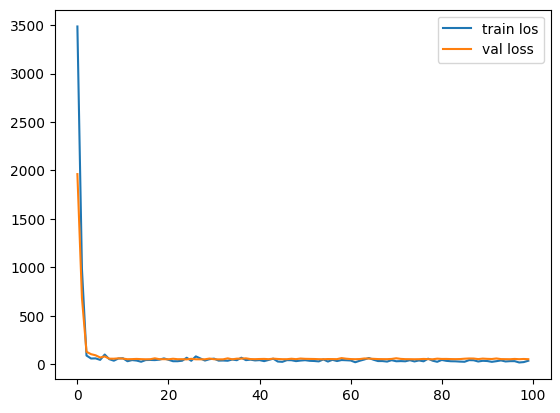

In [7]:
import matplotlib.pyplot as plt
plt.plot(range(100),train_losses,label="train los")
plt.plot(range(100),val_losses,label="val loss")
plt.legend()